In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x_df= pd.read_csv('weightedX.csv',header=None)    #header =None so that first value not taken as header
y_df= pd.read_csv('weightedY.csv',header=None)

In [3]:
x_df.describe()

,0
count,100.000000
mean,4.013451
std,4.788026
min,-4.978000
25%,0.096786
50%,3.753500
75%,8.178025
max,11.853000


# Can be observed that the data isnt normalised hence normalising the training data

In [4]:
x= x_df.values
u= x.mean()
std= x.std()
x= (x-u)/std
x_df_normalised= pd.DataFrame(x)
x_df_normalised= pd.DataFrame(x)

In [5]:
x_df_normalised.describe()

,0
count,1.000000e+02
mean,5.773160e-17
std,1.005038e+00
min,-1.887364e+00
25%,-8.221334e-01
50%,-5.456535e-02
75%,8.741712e-01
max,1.645572e+00


# VISUALISING THE DATA TO CHOOSE THE APPROPRIATE MODEL

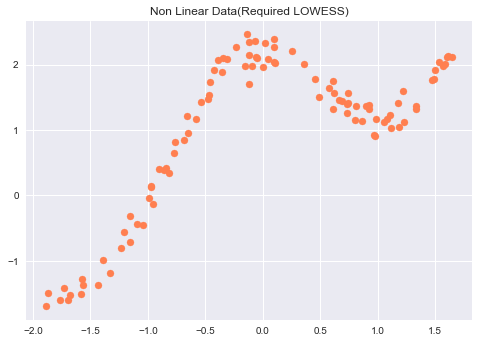

In [6]:
plt.style.use('seaborn')
plt.scatter(x,y_df.values,marker='o',color='coral')
plt.title('Non Linear Data(Required LOWESS)')
plt.show()
y=y_df.values

# Employing LOWESS

Generating the weight matrix

In [102]:
def getW(query_point,x,tau):
    m=x.shape[0]
    weight= np.mat(np.eye(m))
    #print("weight matrix",weight.shape)
    for i in range(m):
        weight[i,i]= np.exp(np.dot((query_point- x[i]),(query_point- x[i]).T)/(-2*tau*tau))
        
    return weight

Prediction method 

In [103]:
def predict(query_point,x,tau,y):
    x0= np.ones((x.shape[0],1))
    x_= np.hstack((x,x0))
    x_= np.mat(x_)
    w= np.mat(getW(query_point,x,tau))
    y= np.mat(y)
    theta= np.mat(np.dot(np.linalg.pinv(x_.T*w*x_),(x_.T*w*y)))
    query_point= np.mat(np.hstack((query_point,1)))
    prediction= query_point*theta
    return theta,prediction

In [104]:
theta,prediction=predict(-1,x,0.5,y)
print("parameter values are:",theta[0,0]," and ",theta[1,0])
print("The prediction at query_point is:",prediction)

parameter values are: 2.491226870150285  and  2.5182199014131896
The prediction at query_point is: [[0.02699303]]


# Seeing variation in output on the basis of change in values of tau

In [105]:
type(x)
type(y)

numpy.ndarray

In [109]:
def plot_prediction(query_point,x,y,tau):
    plt.scatter(x,y,color='yellow')
    y_value=[]
    
    for qp in query_point:
        theta,prediction=predict(qp,x,tau,y)
        y_value.append(prediction)
        
    plt.scatter(y_value,query_point,color='black')
    title="tau="+str(tau)
    plt.title(title)
    plt.show()

In [107]:
x_test= np.linspace(-2,2,20)

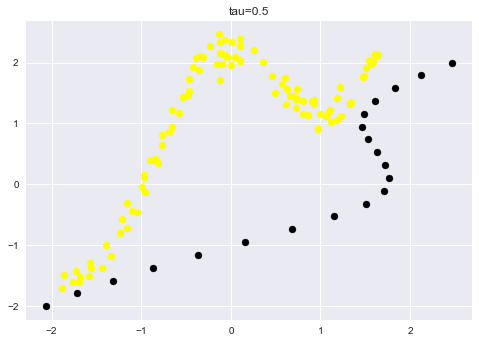

In [110]:
plot_prediction(x_test,x,y,tau=0.5)